In [1]:
import matplotlib.pyplot as plt

from pyvrp import Model
from pyvrp.plotting import plot_coordinates, plot_solution
from pyvrp.stop import MaxRuntime

In [2]:
%matplotlib inline

# A quick tutorial

This notebook provides a brief tutorial to modelling vehicle routing problems with PyVRP.
We will solve the small capacitated VRP instance with 16 clients defined [in the OR-Tools documentation](https://developers.google.com/optimization/routing/cvrp).
This instance has an optimal solution of cost 6208.
The data are as follows:

In [3]:
# fmt: off
COORDS = [
    (456, 320),  # location 0 - the depot
    (228, 0),    # location 1
    (912, 0),    # location 2
    (0, 80),     # location 3
    (114, 80),   # location 4
    (570, 160),  # location 5
    (798, 160),  # location 6
    (342, 240),  # location 7
    (684, 240),  # location 8
    (570, 400),  # location 9
    (912, 400),  # location 10
    (114, 480),  # location 11
    (228, 480),  # location 12
    (342, 560),  # location 13
    (684, 560),  # location 14
    (0, 640),    # location 15
    (798, 640),  # location 16
]
DEMANDS = [0, 1, 1, 2, 4, 2, 4, 8, 8, 1, 2, 1, 2, 4, 4, 8, 8]
# fmt: on

We can use the `Model` interface to conveniently specify our vehicle routing problem using this data.

In [4]:
m = Model()
m.add_vehicle_type(capacity=15, num_available=4)
depot = m.add_depot(*COORDS[0])
clients = [
    m.add_client(*COORDS[idx], demand=DEMANDS[idx])
    for idx in range(1, len(COORDS))
]

locations = [depot, *clients]
for frm in locations:
    for to in locations:
        distance = abs(frm.x - to.x) + abs(frm.y - to.y)  # Manhattan distance
        m.add_edge(frm, to, distance=distance)

Let's inspect the resulting data instance.

In [5]:
data = m.data()

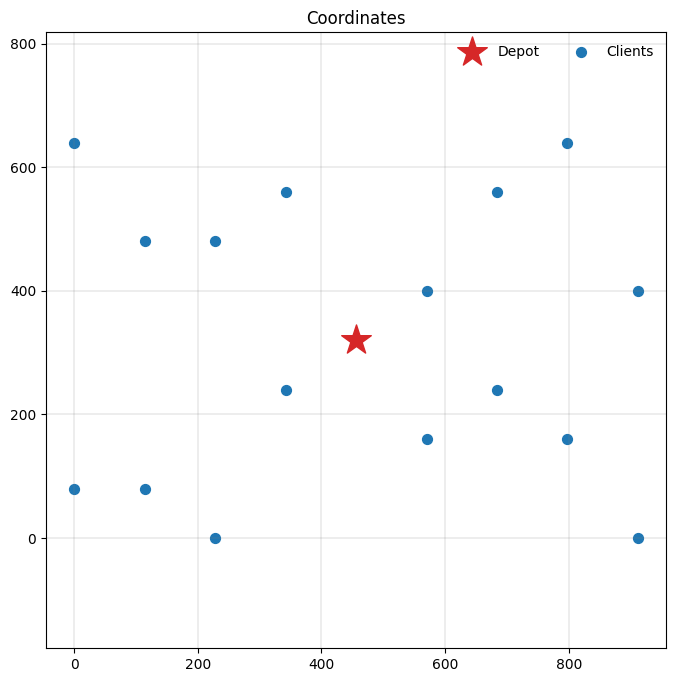

In [6]:
_, ax = plt.subplots(figsize=(8, 8))
plot_coordinates(data, ax=ax)

The instance looks good, so we are ready to solve it.
Let's do so with a second of runtime.

In [7]:
res = m.solve(stop=MaxRuntime(1))  # one second
print(res)

Solution results
    # routes: 4
   # clients: 16
   objective: 6208.00
# iterations: 1002
    run-time: 1.00 seconds

Routes
------
Route  1: 12 11 15 13 
Route  2: 8 2 6 5 
Route  3: 10 16 14 9 
Route  4: 3 4 1 7 


Good! Our solution attains the same objective value as the optimal solution OR-Tools finds.
Let's inspect our solution more closely.

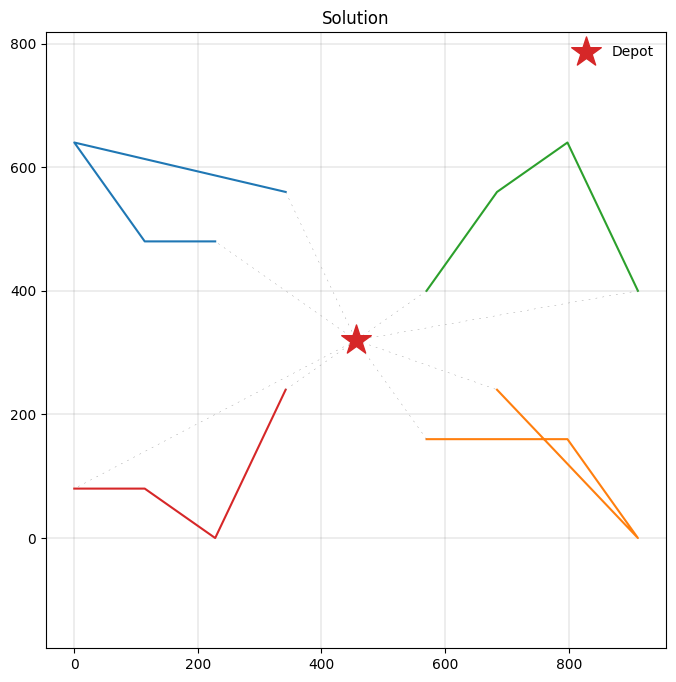

In [8]:
_, ax = plt.subplots(figsize=(8, 8))
plot_solution(res.best, data, ax=ax)

We have just solved our first vehicle routing problem using PyVRP!
Besides the capacitated VRP, PyVRP supports many additional VRP variants.
Have a look at the introduction pages, or the larger examples to see how those can be modelled and solved. 